# Examen Python
Becerra, Jorge Alberto

jorge@koruke.com

In [1]:
# Plots
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Print to cell in markdown format
from IPython.display import Markdown, display

# Data analysis
import pandas as pd

# File management
from pathlib import Path

In [2]:
spreadsheetPath = Path("Examen Phyton.xlsx")
assert spreadsheetPath.exists(), f"File not found: {spreadsheetPath.absolute()}"
spreadsheet = pd.ExcelFile(spreadsheetPath)

In [3]:
# Have a separate dataframe with only the "Practica" and "Departamento" labels to use later
departments = pd.read_excel(spreadsheet, sheet_name="Practica", usecols="A:B", index_col=0)
departments.index = departments.index.map(str)

In [4]:
# Join the first 4 sheets of the spreadsheet into one dataframe

dataFrames = []
for clientIndex in range(0,4):
    clientData = pd.read_excel(spreadsheet, sheet_name=clientIndex, usecols="A:F")
    
    # values 9100 in "Departamento" are stored as integers, transform them to
    # string so it's consistent with the other values
    clientData["Departamento"] = clientData["Departamento"].astype(str)
    
    dataFrames.append(clientData)

data = pd.concat(dataFrames)

# Ventas totales
Consolidar el reporte de ventas totales 

## Ventas totales

### Ventas: $`89015.94`,  Costos: $`37033.54`

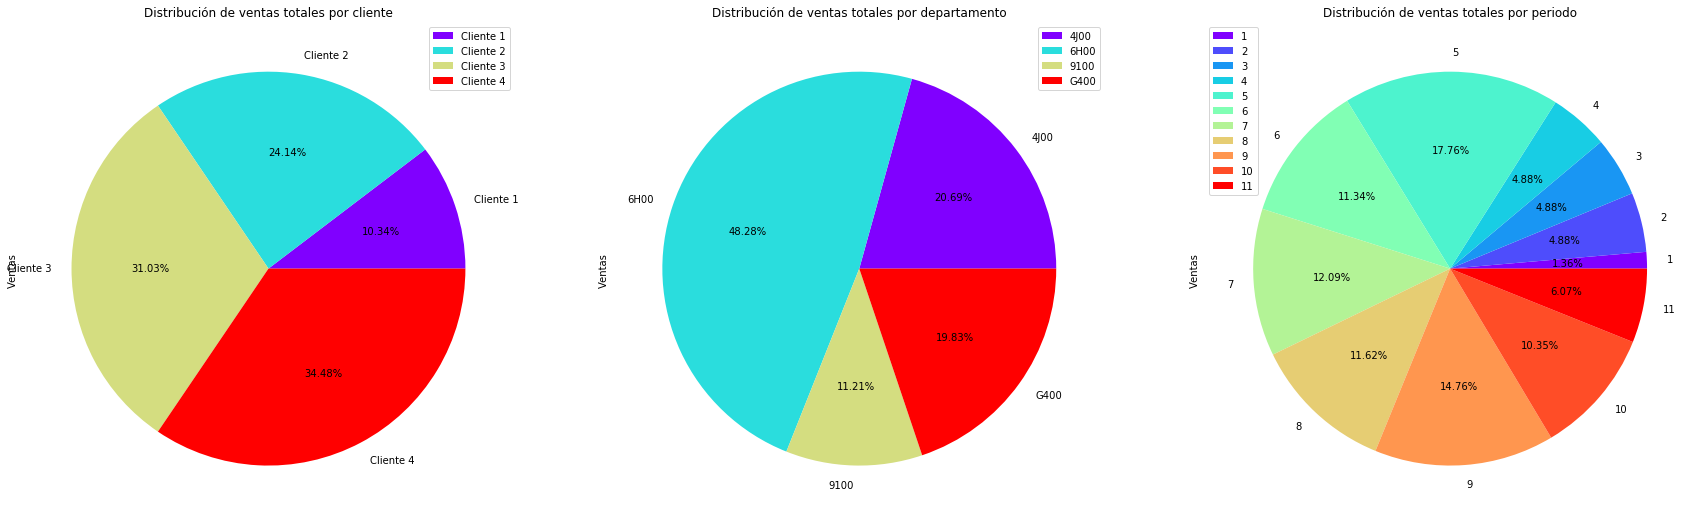

In [5]:
salesPerClient = data.groupby(["PRJ Customer"]).sum()
salesPerDepartment = data.groupby(["Departamento"]).sum()
salesPerPeriod = data.groupby(["Periodo fiscal"]).sum()

fig = plt.figure(figsize=(30, 20))
gs = GridSpec(2, 3)

salesPerClient.plot.pie(
    title="Distribución de ventas totales por cliente",
    y='Ventas ', 
    ax=fig.add_subplot(gs[0,0]),
    autopct=lambda p: '{:.2f}%'.format(p),
    cmap="rainbow")

salesPerDepartment.plot.pie(
    title="Distribución de ventas totales por departamento",
    y='Ventas ', 
    ax=fig.add_subplot(gs[0,1]),
    autopct=lambda p: '{:.2f}%'.format(p),
    cmap="rainbow")

salesPerPeriod.plot.pie(
    title="Distribución de ventas totales por periodo",
    y='Ventas ', 
    ax=fig.add_subplot(gs[0,2]),
    autopct=lambda p: '{:.2f}%'.format(p),
    cmap="rainbow")

display(Markdown("## Ventas totales"))
totalSales = "{:.2f}".format(salesPerClient["Ventas "].sum())
totalCost = "{:.2f}".format(salesPerClient["Costos"].sum())
display(Markdown(f"### Ventas: $`{totalSales}`,  Costos: $`{totalCost}`"))
plt.show()

# Ventas por mes
Hacer un trend de ventas por mes

In [6]:
# Linear regression

salesTrend = salesPerPeriod.reset_index(level=0)
salesTrend = salesTrend.drop(columns=["Costos"])
salesTrend = salesTrend.rename(columns={"Periodo fiscal": "x_i", "Ventas ": "y_i"})

n = salesTrend.shape[0]

s_x  = salesTrend["x_i"].sum()
s_xx = (salesTrend["x_i"] ** 2).sum()

s_y  = salesTrend["y_i"].sum()
s_yy = (salesTrend["y_i"] ** 2).sum()

s_xy = (salesTrend["x_i"] * salesTrend["y_i"]).sum()

beta  = ((n*s_xy) - ((s_x * s_y))) / ((n * s_xx) - (s_x ** 2))
alpha = ((1 / n) * s_y) - (beta * (1 / n) * s_x)

y_trend_func = lambda x: (beta * x) + alpha

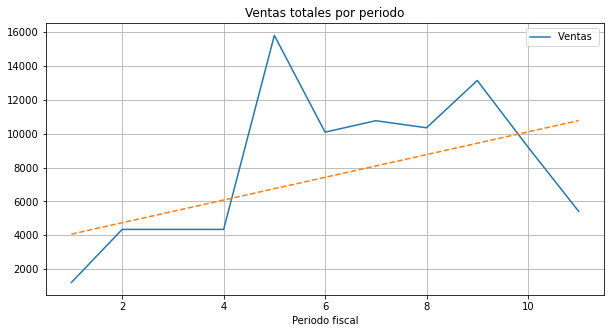

In [7]:
salesPerPeriod.plot(
    title="Ventas totales por periodo",
    y='Ventas ', 
    figsize=(10, 5),
    grid=True
)
plt.plot(
    range(1,12), 
    [y_trend_func(val) for val in range(11)], 
    linestyle="dashed")

plt.show()

In [8]:
salesPerPeriod

,Ventas,Costos
Periodo fiscal,,
1,1211.152907,570.319027
2,4344.323733,1807.414947
3,4344.323733,1807.414947
4,4344.323733,1807.414947
5,15808.398027,6576.934360
6,10090.466867,4198.043093
7,10765.629787,4478.938253
8,10347.121507,4304.821867
9,13141.254880,5467.294600


# Ventas por Práctica (Departamento) por mes
Consolidar un reporte de ventas por practica por mes 

In [9]:
salesPerDepartmentPerMonth = data.groupby(["Departamento", "Periodo fiscal"]).sum()
salesPerDepartmentPerMonth = salesPerDepartmentPerMonth.reset_index().pivot(
    columns="Departamento",
    index="Periodo fiscal",
    values="Ventas "
)
display(Markdown("### Ventas totales por mes por departamento"))
salesPerDepartmentPerMonth

### Ventas totales por mes por departamento

Departamento,4J00,6H00,9100,G400
Periodo fiscal,,,,
1,250.58336,584.694507,135.732653,240.142387
2,898.82560,2097.259733,486.863867,861.374533
3,898.82560,2097.259733,486.863867,861.374533
4,898.82560,2097.259733,486.863867,861.374533
5,3270.70304,7631.640427,1771.630813,3134.423747
6,2087.68280,4871.259867,1130.828183,2000.696017
7,2227.37168,5197.200587,1206.492993,2134.564527
8,2140.78376,4995.162107,1159.591203,2051.584437
9,2718.88032,6344.054080,1472.726840,2605.593640


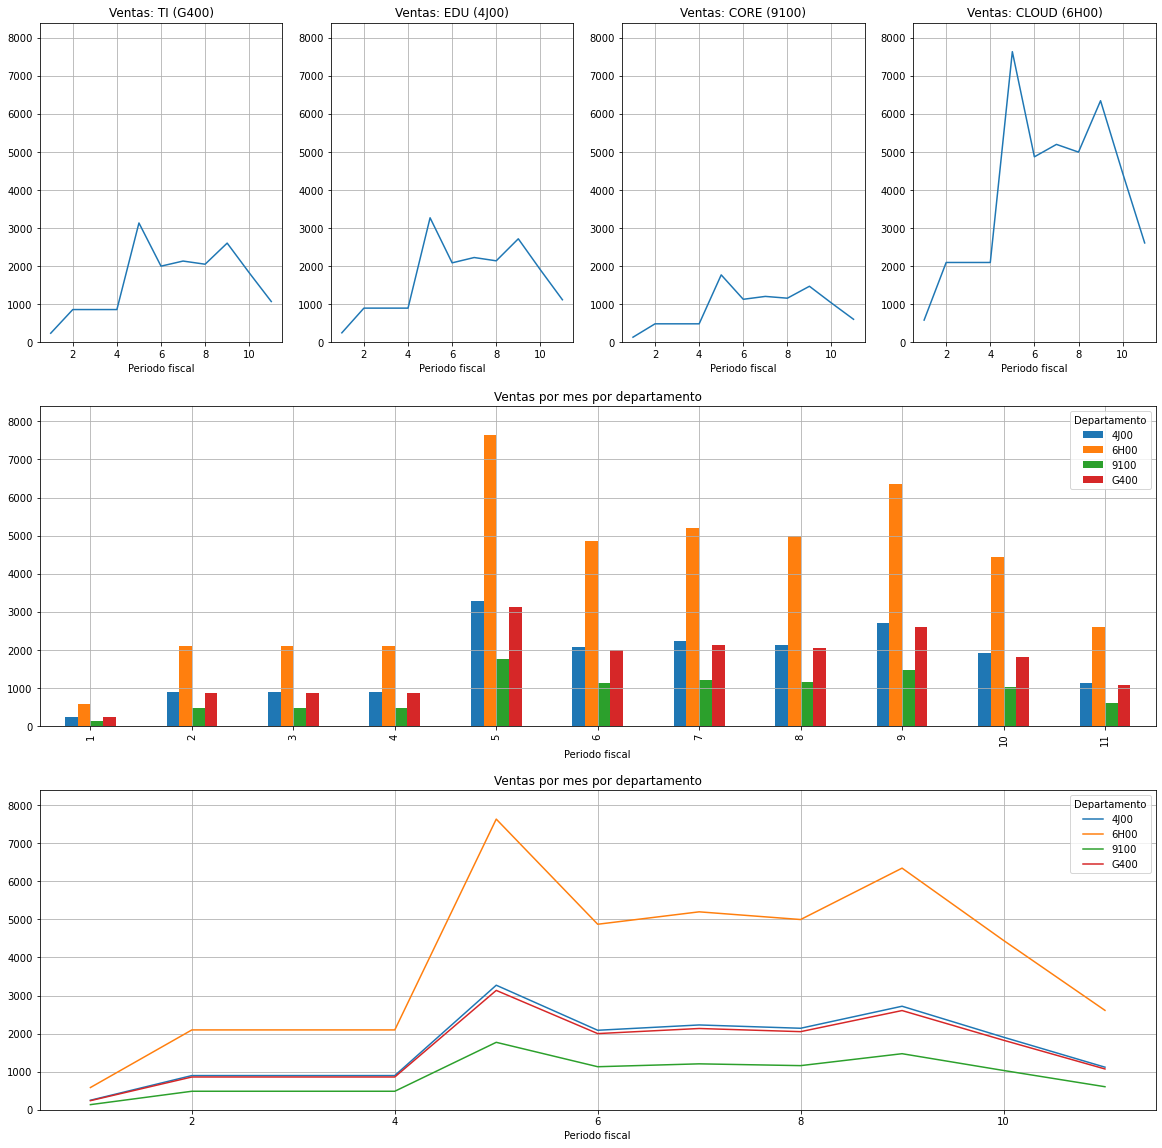

In [10]:
fig = plt.figure(figsize=(20, 20))
gs = GridSpec(3,4)

axYLim = (0, salesPerDepartmentPerMonth.max().max() * 1.1)

for index, department in enumerate(departments.index.tolist()):
    salesPerDepartmentPerMonth[department].plot(
        ax=fig.add_subplot(gs[0,index]), 
        ylim=axYLim,
        title=f"Ventas: {departments.loc[department][0]} ({department})",
        grid=True,
    )

salesPerDepartmentPerMonth.plot.bar(
    ax=fig.add_subplot(gs[1,:]),
    ylim=axYLim,
    grid=True,
    title="Ventas por mes por departamento"
)

salesPerDepartmentPerMonth.plot(
    ax=fig.add_subplot(gs[2,:]),
    ylim=axYLim,
    grid=True,
    title="Ventas por mes por departamento"
)

plt.show()

# Determinar negocio más rentable
Determinar cual es el negocio mas rentable 

In [11]:
salesByDepartment = data.groupby(["Departamento", "Periodo fiscal"]).sum()
cost = salesByDepartment.reset_index().pivot(
    columns="Departamento",
    index="Periodo fiscal",
    values="Costos"
)
sales = salesByDepartment.reset_index().pivot(
    columns="Departamento",
    index="Periodo fiscal",
    values="Ventas "
)

for index, department in enumerate(departments.index.tolist()):
    
    grossProfit = sales[department].sum() - cost[department].sum()
    grossMargin = (sales[department].sum() - cost[department].sum()) / sales[department].sum()
    
    display(Markdown(f"#### {department} - {departments.loc[department][0]}"))
    display(Markdown(f"Gross Profit: `{'{:.2f}'.format(grossProfit)}`"))
    display(Markdown(f"Gross Margin: `{'{:.2f}%'.format(grossMargin * 100)}`"))

#### G400 - TI

Gross Profit: `10306.85`

Gross Margin: `58.40%`

#### 4J00 - EDU

Gross Profit: `10754.98`

Gross Margin: `58.40%`

#### 9100 - CORE

Gross Profit: `5825.61`

Gross Margin: `58.40%`

#### 6H00 - CLOUD

Gross Profit: `25094.95`

Gross Margin: `58.40%`

Todos los departamentos tienen el mismo margen bruto, por lo tanto, tomando en cuenta sólo los ingresos, **CLOUD es el negocio más rentable**

# Pronóstico de ventas del próximo año
Pronosticar las ventas del proximo año

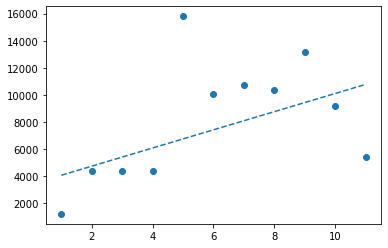

Utilizando la regresión lineal se pueden predecir por periodo con la ecuación:

$$ 670.9405903030311x + 4066.7143963636313 $$

In [12]:
plt.plot(
    range(1,12), 
    [y_trend_func(val) for val in range(11)], 
    linestyle="dashed")
plt.scatter(range(1,12), salesPerPeriod["Ventas "])
plt.show()


display(Markdown(f"Utilizando la regresión lineal se pueden predecir por periodo con la ecuación:"))
display(Markdown(f"$$ {beta}x + {alpha} $$"))

# Seasonality
Identificar si hay un seasonality en algun periodo 

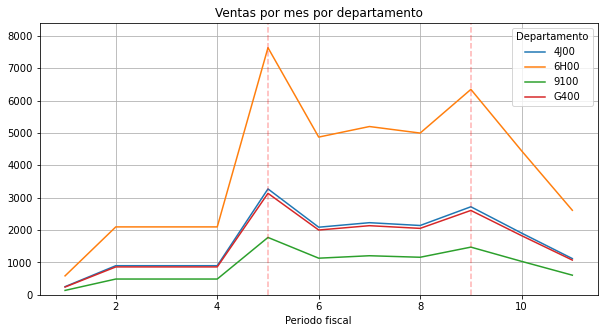

In [13]:
salesPerDepartmentPerMonth.plot(
    ylim=axYLim,
    figsize=(10, 5),
    grid=True,
    title="Ventas por mes por departamento"
)
plt.axvline(x=5, linestyle="dashed", alpha=0.3, c="r")
plt.axvline(x=9, linestyle="dashed", alpha=0.3, c="r")

plt.show()

Con los datos actuales se experimentan cambios predecibles cada cuatro meses, como se puede apreciar en el periodo fiscal 5 y 9, seguido de un periodo estable. Si hay seasonality.